# Linear Regression Single Variable

## ie2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
df = pd.read_csv("homeprices.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


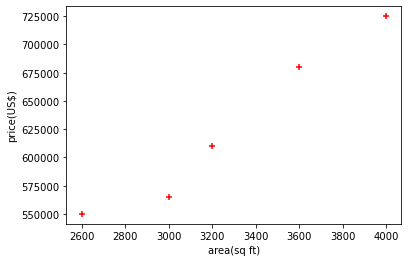

In [3]:
%matplotlib inline
plt.xlabel("area(sq ft)")
plt.ylabel("price(US$)")
plt.scatter(df.area, df.price, color="red", marker="+")

In [35]:
from sklearn.model_selection import train_test_split
X = df[['area']]
y = df[['price']]
np.random.seed(23)
# x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=23)
len(x_test)

2

In [36]:
print(x_test)
# print(x_test.dtype)
print(type(x_test))
print(type(x_test.values.reshape(-1,1)))
print(x_test.values.reshape(-1,1))

4    4000
1    3000
Name: area, dtype: int64
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
[[4000]
 [3000]]


In [37]:
from sklearn.linear_model import LinearRegression as LM
reg = LM()
# reg.fit(df[["area"]], df.price)
reg.fit(X_train, y_train)
print(reg.predict([[3300]]))
print(3300*float(reg.coef_)+float(reg.intercept_))
print(reg.coef_)
print(reg.score(x_test.values.reshape(-1,1), y_test))

[[634605.26315789]]
634605.2631578948
[[127.63157895]]
0.9232979137811631


/Users/bbbarry/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/bbbarry/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


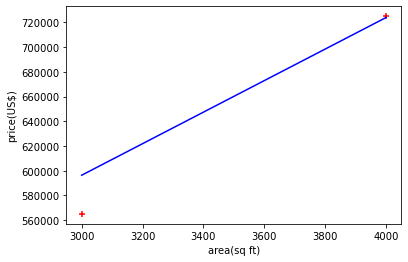

In [38]:
%matplotlib inline
plt.xlabel("area(sq ft)")
plt.ylabel("price(US$)")
plt.scatter(X_test.area, y_test.price, color="red", marker="+")
plt.plot(X_test.area, reg.predict(X_test[["area"]]), color="blue")

### Metrics

In [93]:
import math
from sklearn.metrics import mean_squared_error
rsq = reg.score(X_test, y_test)
rmse = math.sqrt(mean_squared_error(y_test,reg.predict(X_test)))
print(f"rsq: {np.round(rsq, 2)}, \nrmse: {np.round(rmse, 2)}")

rsq: 0.92, 
rmse: 22156.11


### Summary

In [87]:
import statsmodels.api as sm
# reg.summary()
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test) 

print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                              898.9
Date:                Sun, 06 Nov 2022   Prob (F-statistic):                     0.00111
Time:                        20:10:57   Log-Likelihood:                         -35.083
No. Observations:                   3   AIC:                                      72.17
Df Residuals:                       2   BIC:                                      71.26
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/Users/bbbarry/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [90]:
model, reg

(<statsmodels.regression.linear_model.RegressionResultsWrapper at 0x7f875cb8a340>,
 LinearRegression())

### Prediction

In [94]:
import numpy as np
pred = 3000
print(f"price pred for 3000 sqrt ft: {np.round(reg.predict([[pred]]), 2)}, \ncoef: {reg.coef_}, \nintercept: {reg.intercept_}")

price pred for 3000 sqrt ft: [596315.79], 
coef: [127.63157895], 
intercept: 213421.05263157893


In [101]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
d = pd.read_csv("area.csv")
display(d.head(3))
p = np.round(reg.predict(d[['area']]), 2)
d['price'] = p
display(d.head(3))
d.to_csv(r'area.csv', index=False)

,area,price
0,1000,341052.63
1,1500,404868.42
2,2300,506973.68


,area,price
0,1000,341052.63
1,1500,404868.42
2,2300,506973.68


## asgn2

In [102]:
cpci = pd.read_csv("canada_per_capita_income.csv")
cpci.head()

,year,per_capita_income_USD
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


x test length: 12
[[41117.50408711]]
41117.50408710865
[[821.02543985]]
[-1617353.88440462]
92.05%
<class 'numpy.ndarray'>


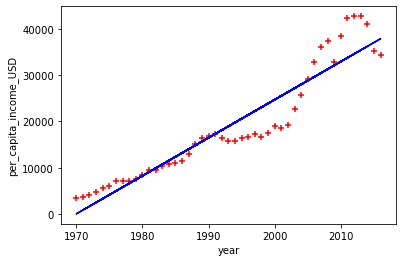

In [103]:
%matplotlib inline
plt.xlabel("year")
plt.ylabel("per_capita_income_USD")
plt.scatter(cpci.year, cpci.per_capita_income_USD, color="red", marker="+")
x = cpci.year.values.reshape(-1,1)
y = cpci.per_capita_income_USD.values.reshape(-1,1)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=23)
print("x test length:", len(x_test))
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
plt.plot(X_train, reg.predict(X_train), color="blue")
print(reg.predict([[2020]]))
print(2020*float(reg.coef_)+float(reg.intercept_))
print(reg.coef_)
print(reg.intercept_)
print(str(round(reg.score(X_test, y_test)*100, 2))+"%")
print(type(x))

In [107]:
from sklearn.model_selection import train_test_split
X = cpci[['year']]
y = cpci[['per_capita_income_USD']]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=23)
X_train.head()

,year
39,2009
10,1980
29,1999
3,1973
22,1992


In [115]:
from sklearn.linear_model import LinearRegression as LM
reg = LM()
reg.fit(X_train, y_train)
print(f"coef: {reg.coef_}, \nintercept: {reg.intercept_}")

coef: [[822.39824632]], 
intercept: [-1620069.2887322]


### Metrics

In [132]:
from sklearn.metrics import mean_squared_error
print('rsq:', round(reg.score(X_test, y_test), 2))
print('rmse:', round(np.sqrt(mean_squared_error(y_test, reg.predict(X_test))), 2))

rsq: 0.9
rmse: 3427.26


### Summary

In [128]:
import statsmodels.api as sm
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test) 

print_model = model.summary()
print(print_model)

                                  OLS Regression Results                                  
Dep. Variable:     per_capita_income_USD   R-squared (uncentered):                   0.710
Model:                               OLS   Adj. R-squared (uncentered):              0.702
Method:                    Least Squares   F-statistic:                              88.05
Date:                   Sun, 06 Nov 2022   Prob (F-statistic):                    3.31e-11
Time:                           20:42:31   Log-Likelihood:                         -400.15
No. Observations:                     37   AIC:                                      802.3
Df Residuals:                         36   BIC:                                      803.9
Df Model:                              1                                                  
Covariance Type:               nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

m 1.9783600000000003, b 0.027960000000000002, cost 5199.1, iteration 0
m 0.20975041279999962, b 0.0030470367999999894, cost 4161.482445460163, iteration 1
m 1.7908456142986242, b 0.025401286955264, cost 3332.2237319269248, iteration 2
m 0.37738163667530467, b 0.005499731626422651, cost 2669.4843523161976, iteration 3
m 1.6409848166378898, b 0.023373894401807944, cost 2139.826383775145, iteration 4
m 0.5113514173939655, b 0.0074774305434828076, cost 1716.5264071567592, iteration 5
m 1.5212165764726306, b 0.021771129698498662, cost 1378.2272007804495, iteration 6
m 0.6184191426785134, b 0.009075514323270572, cost 1107.8601808918404, iteration 7
m 1.4254981563597626, b 0.020507724625171385, cost 891.7842215178443, iteration 8
m 0.7039868810749315, b 0.010370210797388455, cost 719.0974036421305, iteration 9
m 1.3490002310389348, b 0.01951553325074733, cost 581.0869686205, iteration 10
m 0.7723719384951477, b 0.01142244086408669, cost 470.7897237271261, iteration 11
m 1.2878632281408475, b 

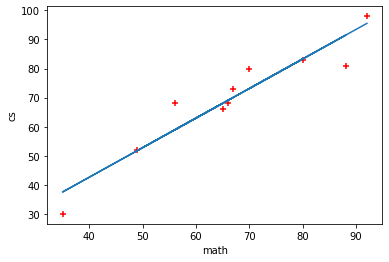

In [340]:
## asgn4
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn import linear_model
# # lm
# def predict_using_sklean():
#     reg = linear_model.LinearRegression()
#     reg.fit(test_scores[["math"]], test_scores.cs)
#     return reg.coef_,reg.intercept_
# # plt
# %matplotlib inline
# plt.xlabel("math")
# plt.ylabel("cs")
# plt.scatter(test_scores.math, test_scores.cs, color = "red", marker = "+")
# plt.plot(test_scores.math, reg.predict(test_scores[["math"]]))

# def gradient_descent(x, y):
#     m_curr = 0
#     b_curr = 0
#     iterations = 100
#     n = len(x)
#     learning_rate = 0.0002
#     cost_prev = 0
#     for i in range(iterations):
#         y_predicted = m_curr * x + b_curr
#         cost = (1/n) * sum([val**2 for val in (y-y_predicted)])
#         md = -(2/n) * sum(x*(y-y_predicted))
#         bd = -(2/n) * sum(y-y_predicted)
#         m_curr = m_curr - learning_rate * md
#         b_curr = b_curr - learning_rate * bd
#         if math.isclose(cost, cost_prev, rel_tol=1e-7):
#             break
#         cost_prev = cost
#         print("m {}, b {}, cost {}, iteration {}".format(m_curr,b_curr,cost, i))
#     return m_curr, b_curr
# if __name__ == "__main__":
#     test_scores = pd.read_csv("test_scores.csv")
#     x = np.array(test_scores.math)
#     y = np.array(test_scores.cs)
    
#     m, b = gradient_descent(x,y)
#     print("Using gradient descent function: Coef {} Intercept {}".format(m, b))
    
#     m_sklearn, b_sklearn = predict_using_sklean()
#     print("Using sklearn: Coef {} Intercept {}".format(float(m_sklearn),float(b_sklearn)))